# Построение графиков с помощью библиотек Python

Для выполнения задания вам понадобится набор данных — информация о пассажирах Титаника. На странице скачивания датасета можно изучить описание данных.

Что нужно сделать:

1.	Создать Python-ноутбук, загрузить в него данные для построения графиков.

2.	Средствами библиотеки Altair или Seaborn построить сгруппированную полосковую диаграмму (grouped bar chart), которая отображает распределение выживших пассажиров по классу кают, и, независимо, по полу.

3.	Настроить параметры диаграммы так, чтобы были выполнены условия:

●	на диаграмме имеется три группы (по классу каюты) по два столбика в каждом;
●  оси (легенда) имеют понятные подписи на русском языке;
●	на диаграмме отсутствует сетка (разлинованный фон);
●	у графика есть лаконичный осмысленный заголовок.

4.	В качестве решения задания прикрепите ссылку на ноутбук и jpeg/png-файл, в котором сохранена сама диаграмма.

In [1]:
import os
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
root_path = os.getcwd()
dir_path = os.path.join(root_path, "datasets")
filename = "train.csv"
file_path = os.path.join(dir_path, filename)

df = pd.read_csv(file_path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df = df[df['Survived'] == 1]

df = df.groupby(["Pclass", "Sex"]).count().reset_index()
df['Sex_group'] = df['Sex'].apply(lambda sex: 'Мужчины' if sex == 'male' else 'Женщины')

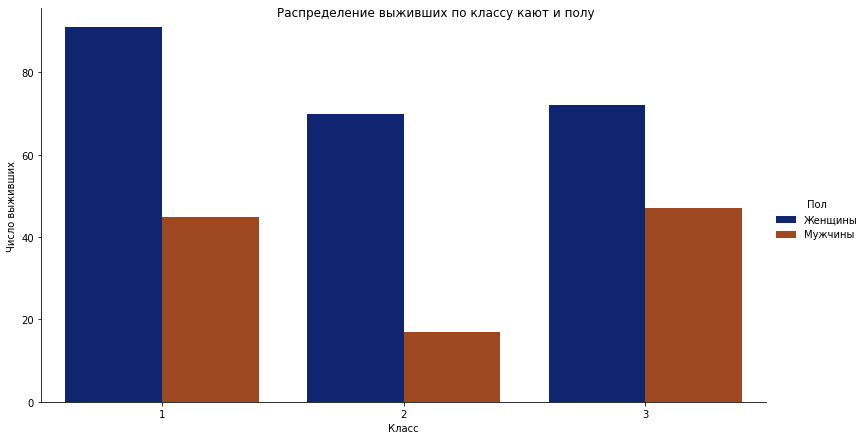

In [4]:
g = sns.catplot(
    data=df, 
    kind="bar",
    x="Pclass", 
    y="Survived", 
    hue="Sex_group", 
    palette="dark", 
    height=6, 
    aspect=16/9
)

g.set_axis_labels("Класс", "Число выживших")
g.legend.set_title("Пол")
g.fig.suptitle("Распределение выживших по классу кают и полу")
plt.savefig('titanic_survived.jpeg')